# Final Project Report

#### STATS 102 Introduction to Data Science Session 2, 2020 Fall

---

# Group 12: Boston Estate Price Prediction

- Pei-Ying Chen(Mandy Chen)(pc210@duke.edu)
- Yutong Sun (ys290@duke.edu)
- Yu Cheng (yc479@duke.edu)


## 1 Introduction
Since 2012, the median home price in Boston has appreciated from 368,000 dollars to 659,598 dollars — an appreciation of nearly 80%. With the increasing housing price, we wonder that how will Boston real estate become in the future? Instead of predicting the hosuing prices, we wonder which machine learing model can best predict the prices. Then, our group use several models to compare with their accuracies.Wwe make the analysis, plot the figures, and get the results. We train the models of housing information data in Boston, Massachusetts, and test the performance and predictive ability of the models. A good model trained with this data can be used to make specific predictions about the house --- especially the value of the house. For the daily work of real estate agents and others, such predictive models have proved very valuable.




## 2 Background 
Boston is the city with the highest level of education for residents in the United States. The world-famous Harvard University and MIT are located in the Boston metropolitan area. With such a well-constructed city, Boston attracts people from all over the world, making Boston one of the most expensive cities in the US. Thus,Boston housing price rockets up.With the increase of the housing price, more and more people focus on its changable trend and try to predict the price. For this project, we also try to figure out the key variables that in fluence the prices, we aim to figure out the best model that can better predict the housing price by applying linear regression model, Scikit-Learn Ridge, LASSO, and decision tree model. Furthermore, our group found that some previous prices analysis have some drawbacks as they just focused on how to predict the prices by using one single model. Therefore, our group decide to compare diffreent models and conclude which model is best sutiable and the most accuracy in predicting the housing price in Boston.In this project, we will use the following variables：
- Area: The total area of a house
- Room: The number of rooms
- Living: The number of people living in a house
- School: The number of schools around a house
- Floor: The floor of a house
- Year: The year that a house is built
- Age:The house age since it was built



# Part I. Data Cleaning

The dataset we use is drawn from Kaggle Dataset: Predicting Boston Housing Prices(2020).The Boston housing dataset consists of 10000 data points, with each datapoint having 7 features(Value, Year, Living, School, Floor, Area, Room). This dataset is a modified version of the Boston Housing dataset found on the UCI Machine Learning Repository. We import the dataset into Jupyter Notebook to visualize the data and derived some basic analysis.

Firstly, we download data as DataFrame, and then using the Quantile Plot (QQ Plot) to check if the target feature（Value) satisfies the normal distribution. We find that the data does not satisfy  normal distribution, so we apply log transformation to the feature to check if the price value’s  distribution close to log normal distribution. We apply log(1+x) transformation to avoid 0 values. After transforming the variable, we will use the QQ plots again and find our target feature data almost lies in the 45° line(figure 1). This implies that our target feature satisfies log normal distribution.

Secondly, we add new variable “Age” by substracting the “Year” value from 2020, which represent the age of the house. And then we analyze the data of each feature seperately as follows. 
a). we draw the distribution plot of each feature, check its skewness to test if it is symmetric distributed. 
b). draw the scatter plot to check the relationship of each feature and the target feature (‘Value’).
c). draw the boxplot to check if there are outliers and drop these outliers.

Third, we draw the scatter plot of each feature and the target feature again to check if the data is more suitable for the log normal distribution.

And then we use the cleanned data to draw the heatmap plot to check the correlation coefficient of each feature and the target feature. This heatmap gives us a overview of the weights of each feature when we use these features to evaluate the target feature(Value).

The data analysis above do give us a good overview of how each feature may influence the value(estate price), but it’s not precise enough to help us predict whether a specific mushroom is edible. So we moved to machine learning methods to do accurate prediction. And the data cleaning above prepares for applying regression model. After that, we imported train test split. Train test split randomly divide X and Y into training set(80%) and test set(20%). In machine learning, the training data is the one which already has the actual value that the model should have predicted and thus the algorithm changes the value of parameters to account for the data in the training set. The test set is a different data. The test data has never been shown to the model before. Therefore, if the trained model also performs well on the test set, then the machine learning model is good.


# Part II. Linear Regression

We apply the Multi-variable Liner Regression model. And we print out the predicted value and compare it to the actual test_data. The coefficient of determination (R2) is an important statistic reflecting how the data fit of the model, and is the ratio of the regression sum of squares to the total sum of squares. The value of R2 is between 0 and 1. Its value reflects the relative degree of regression contribution, that is, the percentage that the regression relationship can explain in the total variation of the dependent variable Y. R2 is the most commonly used index to evaluate the pros and cons of regression models. The larger the R2 (closer to 1), the better the fitted regression.


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
X=  data.drop(['Value'], axis=1)
y=  data['Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)


linear = LinearRegression()
linear.fit(X_train, y_train)
Y_pred = linear.predict(X_test)
Y_compare_linear = pd.DataFrame({'Actual': y_test, 'Predicted': Y_pred})
plt.scatter(Y_compare_linear['Actual'],Y_compare_linear['Predicted'] )
plt.xlabel("Housing Prices")
plt.ylabel("Predicted Housing Prices")
plt.title("Housing Prices vs Housing Predicted prices")
plt.show()
print(metrics.r2_score(y_test, Y_pred))

NameError: name 'data' is not defined

# Part III. Optimization 
(Feature Adjust, LASSO, Ridge, Decision Tree, XGBRegressor)


a).Feature Adjust

According to the data analysis in Part I, we believe that feature “Year” may not be that important for the “Value” (estate price). So we drop this variable from the data set, and do the linear regression again. The R^2 has improved to 0.5947010089577379.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
X=  data.drop(['Value'], axis=1).drop(['Year'], axis=1)
y=  data['Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)


linear = LinearRegression()
linear.fit(X_train, y_train)
Y_pred = linear.predict(X_test)
Y_compare_linear = pd.DataFrame({'Actual': y_test, 'Predicted': Y_pred})
plt.scatter(Y_compare_linear['Actual'],Y_compare_linear['Predicted'] )
plt.xlabel("Housing Prices")
plt.ylabel("Predicted Housing Prices")
plt.title("Housing Prices vs Housing Predicted prices")
plt.show()
print(metrics.r2_score(y_test, Y_pred))

b). Ridge and LASSO 

We apply Ridge and LASSO model, hoping to better optimize the predict accuracy.Because when using the least squares method to calculate the parameters of a linear regression model, if the data set matrix (also called the design matrix) X has multicollinearity, then the method is very sensitive to the noise in the input variable, and its solution will be extremely unstable. In order to solve this problem, there is this section Ridge Regression (Ridge Regression). 
When the design matrix X has multicollinearity (called ill-conditioned matrix in mathematics), the parameter w obtained by the least square method will be very large in value, and the general linear regression model is y=wTx, which is obviously Because w is very large in value, if the input variable x has a small change, its response will become very large in the output result, which is the reason why it is very sensitive to the total noise of the input variable.

If the growth of the parameter w can be restricted so that w does not become particularly large, then the sensitivity of the model to the noise in the input w will be reduced. This is the basic idea of ​​Ridge Regression and Lasso Regrission.

In order to limit the value of the model parameter w, a penalty term is added to the original objective function of the model. This process is called regularization. Although these two models are based on the linear regression, they added constrains to minimize the cost function. 

If the penalty term is the L2 norm of the parameter, it is ridge regression (Ridge Regression)

If the penalty term is the L1 norm of the parameter, it is Lasso Regrission.


# Scikit-Learn Ridge

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(alphas=np.arange(0.0001,100000))
ridgecv.fit(X_train, y_train)
ridgecv.alpha_  

In [ ]:
newX=data.drop('Value',axis=1)
newY=data['Value']

X_train,X_test,y_train,y_test=train_test_split(newX,newY,test_size=0.2,random_state=3)

lr = LinearRegression()
lr.fit(X_train, y_train)

rr = Ridge(alpha=0.01) 
rr.fit(X_train, y_train)
rr100 = Ridge(alpha=ridgecv.alpha_  ) 
rr100.fit(X_train, y_train)

train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)

Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)

Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)

print ("linear regression train score:", train_score)
print ("linear regression test score:", test_score)
print ("ridge regression train score low alpha:", Ridge_train_score)
print ("ridge regression test score low alpha:", Ridge_test_score)
print ("ridge regression train score high alpha:", Ridge_train_score100)
print ("ridge regression test score high alpha:", Ridge_test_score100)

# LASSO

In [ ]:
import math 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression


#newX 训练数据的属性值
X=data.drop('Value',axis=1)
#newY 训练数据的target值
Y=data['Value']
X_train,X_test,y_train,y_test=train_test_split(X,Y, test_size=0.2, random_state=31)

lasso = Lasso() # 默认alpha =1 
lasso.fit(X_train,y_train)

train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)

coeff_used = np.sum(lasso.coef_!=0)
print("training score:", train_score )
print ("test score: ", test_score)
print ("number of features used: ", coeff_used)

lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)

train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)

coeff_used001 = np.sum(lasso001.coef_!=0)
print ("training score for alpha=0.01:", train_score001 )
print ("test score for alpha =0.01: ", test_score001)
print ("number of features used: for alpha =0.01:", coeff_used001)

lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)

train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)

coeff_used00001 = np.sum(lasso00001.coef_!=0)
print ("training score for alpha=0.0001:", train_score00001 )
print( "test score for alpha =0.0001: ", test_score00001)
print ("number of features used: for alpha =0.0001:", coeff_used00001)

lr = LinearRegression()
lr.fit(X_train,y_train)
lr_train_score=lr.score(X_train,y_train)
lr_test_score=lr.score(X_test,y_test)
print ("LR training score:", lr_train_score )
print ("LR test score: ", lr_test_score)

c).Decision Tree

We divided the data into two parts. 80 percent of data is used for training and others are used for testing.We can define some measures, which can be obtained by calculating some errors or fitting degrees. In this project, we quantify the performance of the model by calculating the coefficient of determination R2. The determination coefficient of the model is very common statistical information in regression analysis, and is often used as a standard to measure the predictive ability of the model.  By using determination tree, we train a model. In order to get an optimal model, the model needs to be trained using the grid search method to find the best `'max_depth'` parameter. Understand the `'max_depth'` parameter as the number of questions that the decision tree algorithm allows to ask the data before making predictions.

In [ ]:
import numpy as np
import pandas as pd
import sys, os
sys.path.append(os.getcwd())
import visuals as vs
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

data = pd.read_csv('bj_housing.csv')
prices = data['Value']
features = data.drop('Value', axis = 1)

In [ ]:
data.describe()

In [ ]:
import matplotlib.pyplot as plt
plt.hist(data['Value'], bins=50, color='steelblue', normed=True )#the Value distribution

In [ ]:
plt.hist(data['Room'], bins=50, color='steelblue', normed=True )
#the distribution of room distribution

In [ ]:
#Scattered distribution diagram of each feature and label

Value = data['Value']
RM = data['Room']
Area = data['Area']
Living = data['Living']

import matplotlib.pyplot as plt

def draw(x,y):
    plt.plot(x,y,'o')
    plt.xlabel('RM')
    plt.ylabel('Value')
    plt.show()


plt.plot(RM,Value,'o')
plt.xlabel('Number of rooms in a house')
plt.ylabel('The price of the house')
plt.show()

plt.plot(Area,Value,'o')
plt.xlabel('Area of the house')
plt.ylabel('The price of the house')
plt.show()

plt.plot(Living,Value,'o')
plt.xlabel('The capacity of the room')
plt.ylabel('The price of the house')
plt.show()

draw(RM,Value)
draw(Area,Value)
draw(Living,Value)


In [ ]:
#Model parameter analysis

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,prices,test_size=0.2,random_state=1)
print(features.shape)
print(X_train.shape)
print(X_test.shape)

We divided the data into two part. 80 percents of data are used for training and others are used for testing.

The standard of Justice:
- If we cannot evaluate the training and testing performance of the model quantitativaly,it is difficult to measure the quality of the model. Usually, we can define some measures, which can be obtained by calculating some errors or fitting degree. In this project, we will quantify the performance of the model by calculating the coefficient of determination R2. The determination coefficient of the model is very common statistical information in regression analysis, and is often used as a standard to measure the predictive ability of the model. 

The range of R2 ranges from 0 to 1, which represents the square of the percentage of the correlation between the predicted value and the actual value of the target variable. A value between 0 and 1 indicates how many percent of the target variables in the model can be explained by features.

In [ ]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    score = r2_score(y_true,y_predict)

    return score

In [ ]:
import numpy as np

def performance_metric2(y_true, y_predict):
    y_true_arr = np.arr(y_true)
    y_predict_arr = np.arr(y_predict)
    
    # Mean value
    y_true_mean = np.mean(y_true_arr)
    
    ss_tot=0
    ss_reg=0
    ss_res=0
    
    for index in range(y_true_arr):
        ss_tot += (y_true_arr[index] - y_true_mean)**2
    
    for index in range(y_true_arr):
        ss_reg += (y_predict_arr[index] - y_true_mean)**2
        
    for index in range(y_true_arr):
        ss_res += (y_predict_arr[index] - y_true_arr[index])**2
    score = 1 - (ss_res/ss_tot)

    return score

Under different parameters, the model performs differently on the training set and the validation set. For a specific algorithm-decision tree with pruning, and a parameter of this algorithm `'max_depth'`. Use all training sets for training, select different `'max_depth'` parameters, and observe how changes in this parameter affect the performance of the model.

In [ ]:
#According to different training set size and maximum depth, generate learning curve

vs.ModelLearning(X_train, y_train)
plt.show()

In [ ]:
vs.ModelComplexity(X_train, y_train)

The maximum depth is 3, the training effect is the best. As the amount of training data increases, the score of the training set curve will get lower and lower, from 1 to infinitely approaching to convergence to 0.72. If there is more training data, the performance of the model cannot be effectively improved

The area in the following code will output an image, which shows the performance of a trained and validated decision tree model under different maximum depth conditions. This graph will contain two curves, one is the change in training and the other is the change in test. Similar to the learning curve, the shaded area represents the uncertainty of the curve, and the performance_metric function used for the scoring of the model training and testing parts.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    
    cross_validator = KFold()
    
    regressor = DecisionTreeRegressor()

    params = {"max_depth":np.arange(1,11)}

    scoring_fnc = make_scorer(performance_metric)

    grid = GridSearchCV(regressor,params,scoring_fnc,cv=cross_validator)

    # Perform grid search based on input data [X,y]
    grid = grid.fit(X, y)
    
    print(pd.DataFrame(grid.cv_results_))
    
    # Return to the optimal model after grid search
    return grid.best_estimator_

The trade-off between bias and variance:

- When the maximum depth is 1, the R2 score is low, the model has a large deviation, the distance between the two lines is small, and the variance is small; when the maximum depth is 10, the R2 score high deviation is small, and the distance between the two lines increases, and the variance Big.

When the model can match the training set and the test set well, the deviation is small and the model adaptability is good; when the model performs well on the training set but not well on the test set, it indicates that the fitting is too high, the complexity is high, and the variance Big

When the maximum depth is 1 training, the prediction of the model is very biased, because the model is not complex enough to capture the basic relationship, its score is less than 0.6, and the score is too low because the model complexity is too low; when the model is When training with a maximum depth of 10, there is a large variance, that is, overfitting occurs. This is because the model is too complicated and a good match can be obtained for the training set, but the model cannot be generalized to more Data, the test set score is too low, the method to solve this problem is to increase the amount of data and reduce the complexity of the model.

Optimal model：

- It is better when the maximum depth is 6, at this time the test set has the highest score on the model.

- Use the decision tree algorithm to train a model. In order to get an optimal model, the model needs to be trained using the grid search method to find the best `'max_depth'` parameter. Understand the `'max_depth'` parameter as the number of questions that the decision tree algorithm allows to ask the data before making predictions.

In [ ]:
optimal_reg = fit_model(X_train, y_train)
print(optimal_reg)
# Output the'max_depth' parameter of the optimal model、
print("Parameter 'max_depth' is {} for the optimal model.".format(optimal_reg.get_params()['max_depth']))

In [ ]:
y_predict = optimal_reg.predict(X_test)
r2 = performance_metric(y_test,y_predict)

print("Optimal model has R^2 score {:,.2f} on test data".format(r2))

This analysis uses the grid search method to train the model to find the best `'max_depth'` parameter, obtain the best model of Boston housing price prediction, and use cross validation to verify the model.

The effect of the model is not bad, the R2 score is 0.72, the variance is not large, and the sample can be reasonably predicted

d).XGBRegressor

Firstly, similar to Ridge and LASSO, XGBoost adds a regular term to the cost function to control the complexity of the model. The regular term contains the number of leaf nodes of the tree and the sum of squares of the L2 modulus of the Score output on each leaf node. From the perspective of bias-variance tradeoff, the regular term reduces the vairance of the model, making the learned model simpler and preventing overfitting.

Second, XGBoost model "calculates the gain of each feature, and finally select the feature with the largest gain for splitting. The weight adjustment of the parameters makes the model more realistic" (Wei, 2017).

In [ ]:
from xgboost import XGBRegressor
from sklearn import metrics

#Create a XGBoost Regressor
reg = XGBRegressor()

# Train the model using the training sets 
reg.fit(X_train, y_train)
y_pred = reg.predict(X_train)
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()
y_test_pred = reg.predict(X_test)
acc_xgb = metrics.r2_score(y_test, y_test_pred)
print(metrics.r2_score(y_test, y_test_pred))

This is more accurate prediction: According to Weili Yan, XGBoost adds a regular term to the cost function to control the complexity of the model. The regular term contains the number of leaf nodes of the tree and the sum of squares of the L2 modulus of the Score output on each leaf node. From the perspective of bias-variance tradeoff, the regular term reduces the vairance of the model, making the learned model simpler and preventing overfitting.


# Part IV. Result and Evaluation

For Data Cleaning Part

After data cleaning, from the graphes(Figure 2), we could direclty see that the data has been cleaned and the ranges are narrowed down. And then we use the Quantile plot again, the skwness change from 0.731 to 0.371 (Skewness is a measure of the symmetry of a distribution. 
If skewness is less than −1 or greater than +1, the distribution is highly skewed.
If skewness is between −1 and −½ or between +½ and +1, the distribution is moderately skewed.
If skewness is between −½ and +½, the distribution is approximately symmetric).

From this graph(figure 3), we could conclude that feature "Room", "Living", "Area" is more close to linear relationship with the "value" (Strong Correlation). While "Floor", "School" is not closely related to "Value"(Weak Correlation). And "Age" is Medium Correlation with "Value". The data analysis does give us a good overview of how each feature may influence the value(estate price). 



For the Linear Regression Part
In the linear regression model, the coefficient of determination is 0.566572379184338. This indicates that our data is not accurate enough.
This may be caused by the variables distributon. According to the data analysis part, we have found that many variables are not in linear relationship with the target feature. So that’s why the result of linear regression is not that accurate.
After the optimization of removing the variable [Year], the R^2 then becomes 0.5665981287966612, which slightly increases.

For Scikit-Learn Ridge and LASSO
After applying the two model, the score (R^2) has decreased to 0.5421388324701485 and 0.5511243442415854 seperately. The inaccuracy of Result may be caused by the inaccurate alpha adjustment. And for LASSO, we think the reason is that LASSO will select variables instead of treating all variables as features. This leads to a reduction in the number of our features. For a database with a large number of variables, the accuracy of prediction may be improved after LASSO clears individual variables, but our database has very few variables, and the variables after elimination are not enough to support the accurate prediction of the model. And another important reason is that multicollinearity between variables in our dataset is not obvious and may not influence the previous linear regression model. So LASSO and Ridge’s adjustment are not useful for our data set.

For Decision Tree
After applying this model, the R^2 score becomes 0.72


For XGBRegressor

The R-square of this model is 0.8161119861094074. This is the highest score by now. Because, according to XGBoost adds a regular term to the cost function to control the complexity of the model. The regular term contains the number of leaf nodes of the tree and the sum of squares of the L2 modulus of the Score output on each leaf node. From the perspective of bias-variance tradeoff, the regular term reduces the vairance of the model, making the learned model simpler and preventing overfitting.


# Conclusion


Boston estate price is influenced by the “Area” (the area of the house), “Living” (how much people in each house), and “Room” (the room numbers in each house) significantly. Comparing our five models’ R-square (score), the result indicates that the XGBoost is the most optimized one for the predicting of the Boston estate price. 

limitation：due to the time limit, we are not able to adjust the parameters in the XGBoost and learn much more about it. 


## 6 Individual Contribution 
Group Member 1: Pei-Ying Chen(Mandy Chen)
Data Collection+Regression Model (model applying)+Decision Tree Model + Presentation+ Report

Group Member 2: Yutong Sun
Data Cleaning &Analysis +Regression Model（feature adjustment and using LASSO,Ridge)+Decision Tree Model + XGBoost+Report

Group Member 3: Yu Cheng
Data Deciding+Report Organization(Prediction+Conclusion) +Decision Tree Model +Presentation


## Appendix


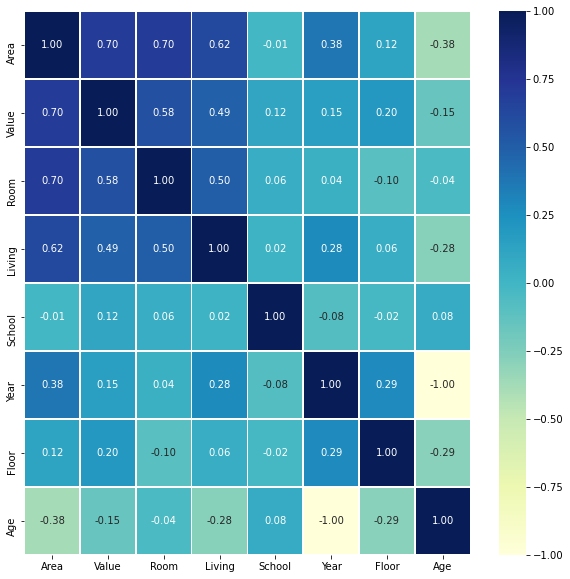

Linear Regression Model

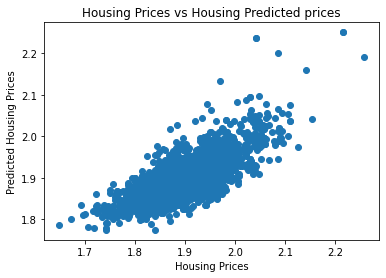

Linear Regression Model--After Optimization

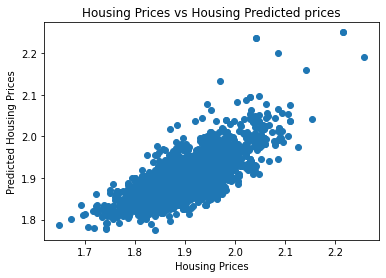

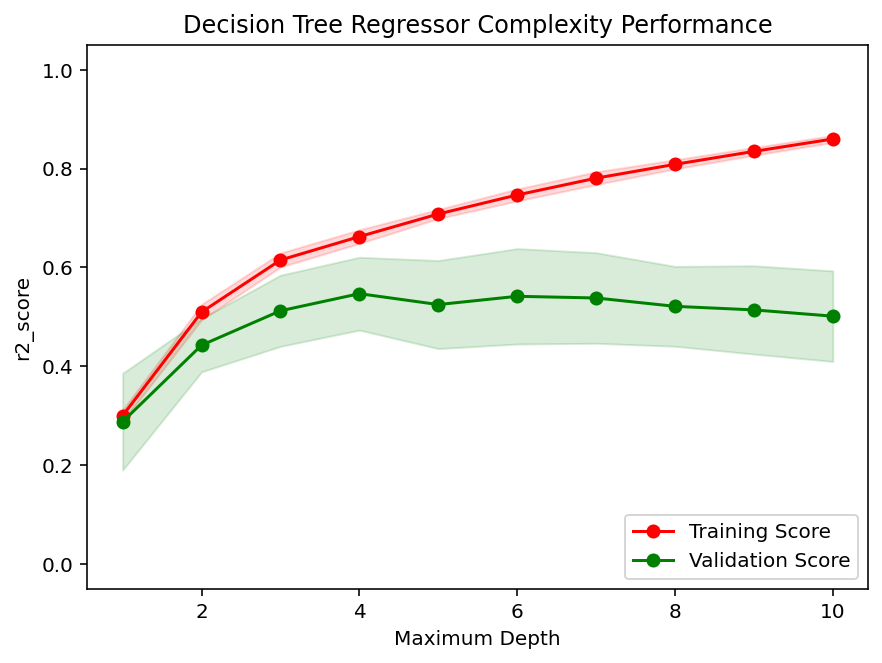

XGB Regressor Model

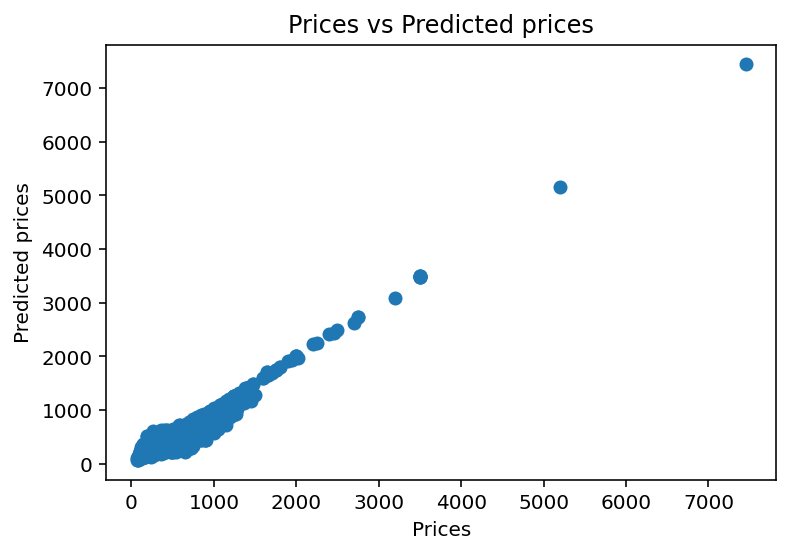

## References
- 机器学习经验总结之XGBoost. (n.d.). Retrieved from https://www.jianshu.com/p/8346d4f80ab0
- S. (2019, March 5). Boston house price prediction. Kaggle. https://www.kaggle.com/shreayan98c/boston-house-price-prediction
- 基于Python预测波士顿房价. (2018). 知乎专栏. https://zhuanlan.zhihu.com/p/48702850
- Measures of Shape: Skewness and Kurtosis. (2020). Https://Brownmath.Com/Stat/Shape.Htm. https://brownmath.com/stat/shape.htm
- GeeksforGeeks. (2019, November 25). Decision Tree Introduction with example. https://www.geeksforgeeks.org/decision-tree-introduction-example/
- Introduction to XGBoost Algorithm for Classification and Regression | Analytics Steps. (2020). Https://Www.Analyticssteps.Com/Blogs/Introduction-Xgboost-Algorithm-Classification-and-Regression. https://www.analyticssteps.com/blogs/introduction-xgboost-algorithm-classification-and-regression
- 脊回归（Ridge Regression）_Daunxx的专栏-CSDN博客. (2016). Https://Blog.Csdn.Net/Daunxx/Article/Details/51578787. https://blog.csdn.net/daunxx/article/details/51578787



APA style is used here: https://irsc.libguides.com/apa